In [1]:
from numpy.random import default_rng
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
rng = default_rng(seed=2024)

# create random x
x = rng.uniform(-1, 1, 100)
# create random y
y = x * 0.6 + rng.normal(0, 0.25, 100)

In [3]:
def likelihood(beta, x, y):
    return np.prod(norm(x * beta, 0.25).pdf(y))

In [4]:
rng = default_rng(seed=20240316)

num_iterations = 1e4
samples = []
proposals = []
results = []

current = 0.55

for _ in range(int(num_iterations)):
    # record current sample
    samples.append(current)
    # flip coin to generate proposal
    proposal = current + rng.normal(0, 0.1)
    proposals.append(proposal)
    # decide whether to accept proposal or not
    prob_move = likelihood(proposal, x, y) / likelihood(current, x, y)
    if rng.random() < prob_move:
        current = proposal
        results.append(True)
    else:
        current = current
        results.append(False)

In [5]:
# grid approximation
betas = np.arange(0.4, 0.75, 0.005)
likelihoods = [likelihood(beta, x, y) for beta in betas]
probabilities = likelihoods / np.sum(likelihoods)

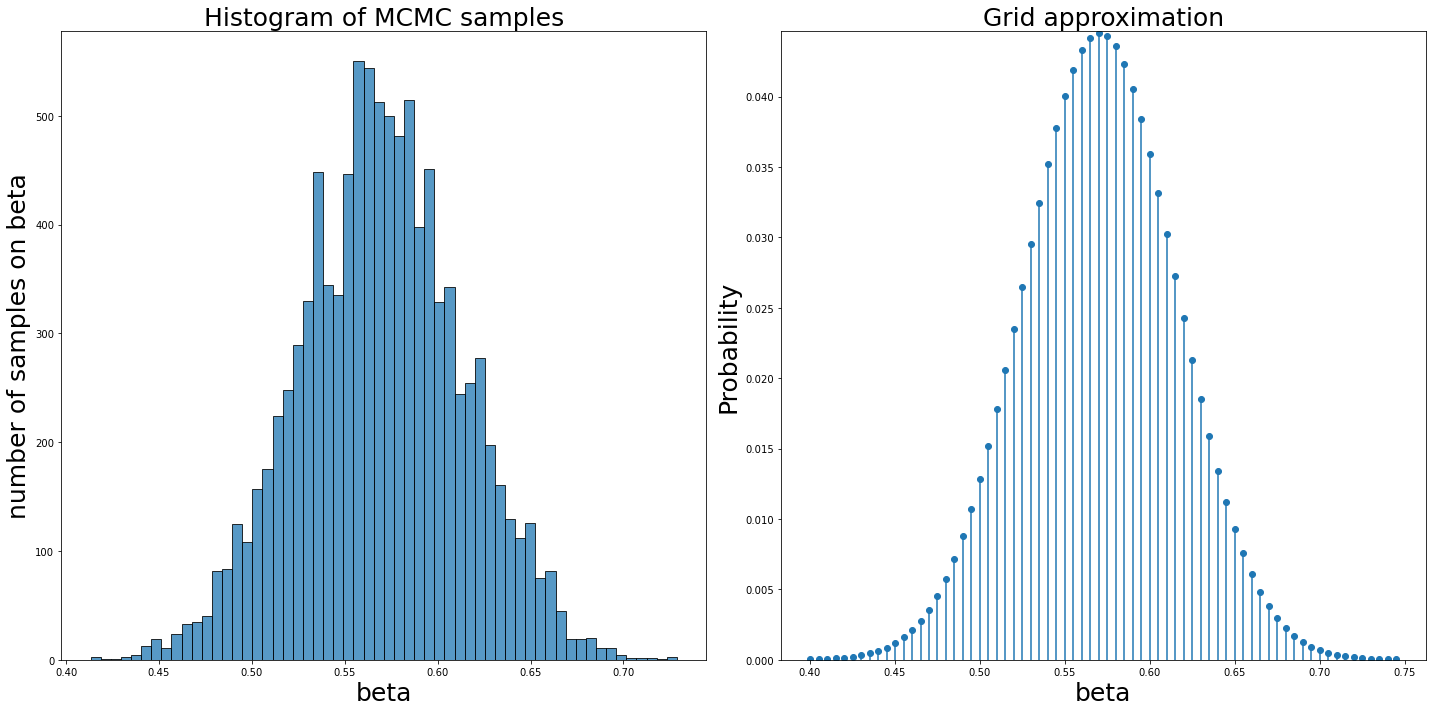

In [6]:
fig, ax = plt.subplots(figsize=(20, 10), ncols=2)
sns.histplot(samples , ax=ax[0], color='tab:blue')
ax[0].set_title('Histogram of MCMC samples', fontsize=25)
ax[0].set_xlabel('beta', fontsize=25)
ax[0].set_ylabel('number of samples on beta', fontsize=25)

for beta, probability in zip(betas, probabilities):
    ax[1].plot([beta, beta], [0, probability], color='tab:blue')
ax[1].scatter(betas, probabilities, color='tab:blue')
ax[1].set_ylim(0, np.max(probabilities) + 0.0001)
ax[1].set_xlabel('beta', fontsize=25)
ax[1].set_ylabel('Probability', fontsize=25)
ax[1].set_title('Grid approximation', fontsize=25)
plt.tight_layout()

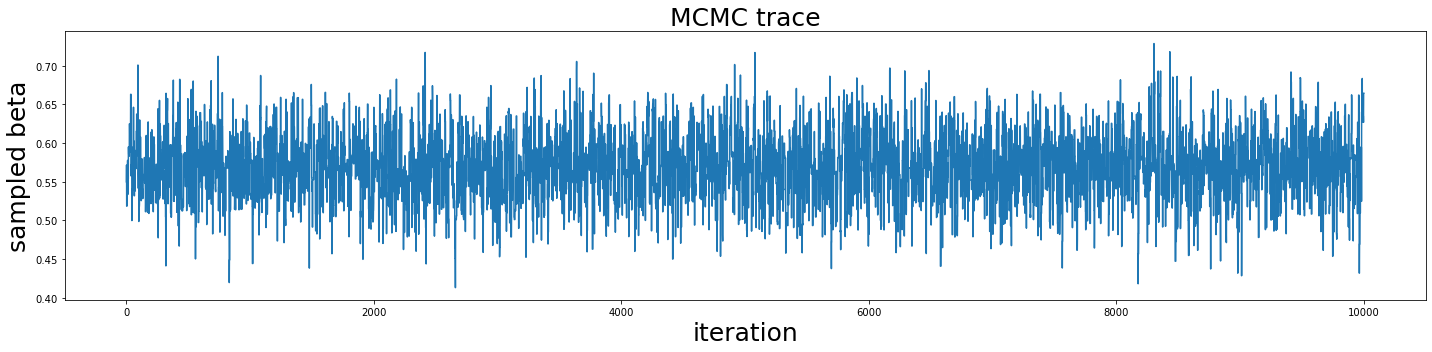

In [7]:
idx = 10000
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(range(idx), samples[:idx + 1], '-')
ax.set_title('MCMC trace', fontsize=25)
ax.set_xlabel('iteration', fontsize=25)
ax.set_ylabel('sampled beta', fontsize=25)
plt.tight_layout()

In [8]:
for idx in range(100):
    fig, ax = plt.subplots(figsize=(30, 10), ncols=3)
    # plot the lines
    sns.lineplot(x=x, y=samples[idx] * x, ax=ax[0], color='tab:orange', lw=4)
    sns.lineplot(x=x, y=proposals[idx] * x, ax=ax[0], color='tab:blue', lw=4)
    if results[idx]:
        # arrow to show the move
        ax[0].annotate('', xy=(1, proposals[idx]), xytext=(1, samples[idx]), arrowprops=dict(facecolor='tab:green', shrink=0.05))
    else:
        # arrow to show the move
        ax[0].annotate('', xy=(1, proposals[idx]), xytext=(1, samples[idx]), arrowprops=dict(facecolor='tab:red', shrink=0.05))
    sns.scatterplot(x=x, y=y, color='tab:gray', ax=ax[0])
    ax[0].set_xlim(-1.05, 1.05)
    
    ax[1].plot(range(idx + 1), samples[:idx + 1], 'o-', markersize=20, lw=2)
    ax[1].set_xlim(0, 100)
    ax[1].set_ylim(0.45, 0.75)
    ax[1].set_title('MCMC trace', fontsize=40)
    ax[1].set_xlabel('iteration', fontsize=40)
    ax[1].set_ylabel('sampled beta', fontsize=40)

    sns.histplot(samples[:idx+1], ax=ax[2], color='tab:blue', bins=np.arange(0.4, 0.9, 0.01))
    ax[2].set_title('Histogram of MCMC samples', fontsize=40)
    ax[2].set_xlabel('beta', fontsize=40)
    ax[2].set_ylabel('number of samples', fontsize=40)

    plt.tight_layout()
    plt.savefig(f'lines_continuous/frame{idx:07d}.png')
    plt.close()

In [9]:
for idx in range(4):
    fig, ax = plt.subplots(figsize=(30, 10), ncols=3)
    # plot the lines
    sns.lineplot(x=x, y=samples[idx] * x, ax=ax[0], color='tab:orange', lw=4)
    sns.lineplot(x=x, y=proposals[idx] * x, ax=ax[0], color='tab:blue', lw=4)
    if results[idx]:
        # arrow to show the move
        ax[0].annotate('', xy=(1, proposals[idx]), xytext=(1, samples[idx]), arrowprops=dict(facecolor='tab:green', shrink=0.05))
    else:
        # arrow to show the move
        ax[0].annotate('', xy=(1, proposals[idx]), xytext=(1, samples[idx]), arrowprops=dict(facecolor='tab:red', shrink=0.05))
    sns.scatterplot(x=x, y=y, color='tab:gray', ax=ax[0])
    ax[0].set_xlim(-1.05, 1.05)
    
    ax[1].plot(range(idx + 1), samples[:idx + 1], 'o-', markersize=20, lw=2)
    ax[1].set_xlim(0, 10)
    ax[1].set_ylim(0.45, 0.75)
    ax[1].set_title('MCMC trace', fontsize=40)
    ax[1].set_xlabel('iteration', fontsize=40)
    ax[1].set_ylabel('sampled beta', fontsize=40)

    sns.histplot(samples[:idx+1], ax=ax[2], color='tab:blue', bins=np.arange(0.4, 0.9, 0.01))
    ax[2].set_title('Histogram of MCMC samples', fontsize=40)
    ax[2].set_xlabel('beta', fontsize=40)
    ax[2].set_ylabel('number of samples', fontsize=40)

    plt.tight_layout()
    plt.savefig(f'lines_continuous/extra_{idx:07d}.png')
    plt.close()